<h1 style="text-align:center;">Convolutional Neural Networks (CNN)</h1>

**Below are key concepts used in Convolutional Neural Networks.**

# Convolution Operation
The aim of convolution operation is to reduce the size of an image, by using feature detectors that keep only the specific patterns within the image. Stride is the number of pixels with which we slide the detector. If it is one, we are moving it one pixel each time and recording the value (adding up all the multiplied values). Many feature detectors are used, and the algorithm finds out what is the optimal way to filter images. 3 x 3 feature detector is commonly used, but other sizes can be used.

# ReLU
After feature detectors are applied upon images, ReLU is used to increase non-linearity within images.

# Max Pooling
Take a 2 x 2 box on the top left corner (starting here), and record the maximum number within the box. Slide it to the right with the stride of 2 (commonly used), and move onto the next row if completed. Repaet this step until all the pixels are evaluated. Aim of max pooling is to keep all the important features even if images have spatial or textual distortions, and also reduce the size which prevents overfitting. So, after applying convolution operation to images, than pooling is applied.

Other pooling techniques are also available such as Mean Pooling, which takes the average of pixels within the box.

# Flattening
Flatten the matrix into a long vector which will be the input to the artificial neural network

# Full Connection
Implement full Artificial Neural Network model to optimize weights.

# Softmax & Cross entropy
Softmax function brings all predicted values to be between 0 and 1, and make them add up to 1. It also comes hand-in-hand with cross-entropy method.

Just seeing how many wrong predictions the classifier made is not enough to evaluate the performance of ANNs. Instead, Cross Entropy should be used to measure how good the model is, as there can be two models that produce same results while one produced better percentages than the other. For classificaion, Cross Entropy should be used, and for regression, Mean Squared Error should be used.

# Build the CNN mode

# implementation Part-1

In [1]:
import numpy as np
import cv2
import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras import backend as bk
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad,Adamax
from tensorflow.keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image

In [3]:
class_name=["cats","dogs"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

In [4]:
print(len(label_name))

2


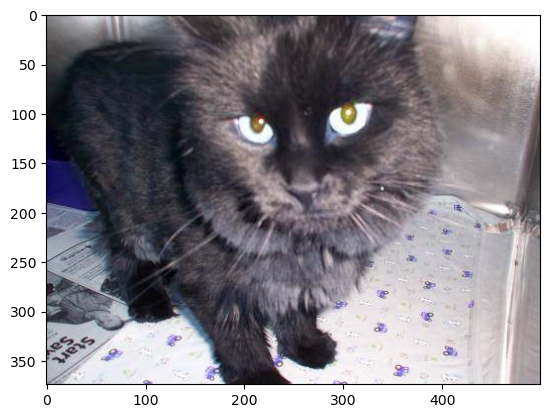

In [5]:
image_path=cv2.imread("../input/cat-and-dogs/dataset/training_set/cats/cat.1010.jpg")
plt.imshow(image_path)
plt.show()

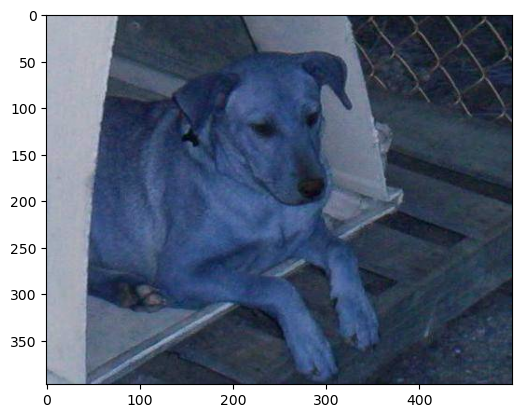

In [6]:
image_path=cv2.imread("../input/cat-and-dogs/dataset/training_set/dogs/dog.100.jpg")
plt.imshow(image_path)
plt.show()

In [7]:
image_shape=(128,128)

# Dataset Load and Labeling

In [8]:
def data_set_load():
    
    data_path=["../input/cat-and-dogs/dataset/training_set/","../input/cat-and-dogs/dataset/test_set/"]

    image_data_output=[]
    for i in data_path:
        image_data=[]
        label_data=[]
        print("Counting:{}".format(i))
        
        for j in os.listdir(i):
            label=label_name[j]
            for image_data_file in tqdm(os.listdir(os.path.join(i,j))):
                image_path=os.path.join(os.path.join(i,j),image_data_file)
                image=cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_shape)
                image_data.append(image)
                label_data.append(label)
                
        image_data=np.array(image_data,dtype="float32")
        label_data=np.array(label_data,dtype="float32")
        image_data_output.append((image_data,label_data))
        
    return image_data_output

In [9]:
data_set_load()

Counting:../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:28<00:00, 141.41it/s]


Counting:../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:08<00:00, 114.95it/s]


[(array([[[[237., 230., 222.],
           [237., 230., 222.],
           [237., 230., 222.],
           ...,
           [225., 221., 210.],
           [223., 219., 208.],
           [223., 219., 208.]],
  
          [[238., 231., 223.],
           [238., 231., 223.],
           [238., 231., 223.],
           ...,
           [229., 225., 214.],
           [229., 226., 214.],
           [225., 221., 210.]],
  
          [[239., 232., 224.],
           [239., 232., 224.],
           [239., 232., 224.],
           ...,
           [233., 229., 218.],
           [234., 230., 219.],
           [228., 225., 213.]],
  
          ...,
  
          [[192., 183., 166.],
           [185., 176., 159.],
           [188., 179., 162.],
           ...,
           [186., 181., 159.],
           [185., 180., 158.],
           [186., 181., 159.]],
  
          [[191., 182., 165.],
           [184., 175., 158.],
           [187., 178., 161.],
           ...,
           [183., 179., 155.],
           [183., 

In [10]:
(X_train,Y_train),(X_test,Y_test)=data_set_load()

Counting:../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:12<00:00, 323.88it/s]


Counting:../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:03<00:00, 319.86it/s]


In [11]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=42)

In [12]:
_,train_image_label_info=np.unique(Y_train,return_counts=True)
_,test_image_label_info=np.unique(Y_test,return_counts=True)

In [13]:
print("Train image label information for 0 class  :",train_image_label_info[0])
print("Train image label information for 1 class  :",train_image_label_info[1])

Train image label information for 0 class  : 4000
Train image label information for 1 class  : 4000


In [14]:
print("Test image label information for 0 class  :",test_image_label_info[0])
print("Test image label information for 1 class  :",test_image_label_info[1])

Test image label information for 0 class  : 1000
Test image label information for 1 class  : 1000


# Create DataFrame For Image Label

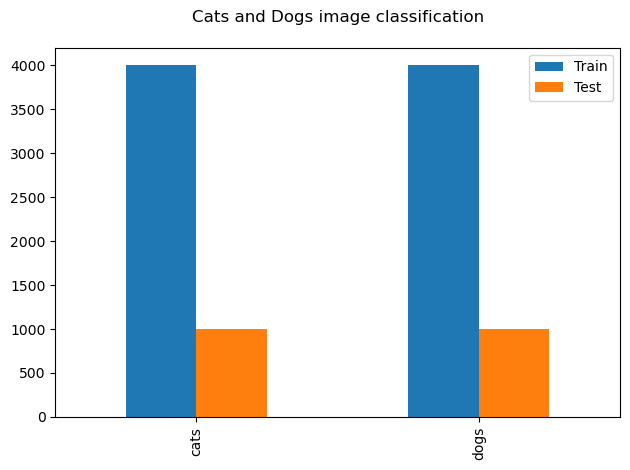

In [15]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name).plot.bar()
plt.title("Cats and Dogs image classification\n")
plt.grid(False)
plt.tight_layout()
plt.show()

In [16]:
x=pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)

In [17]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)

Train  Test
cats   4000  1000
dogs   4000  1000

In [18]:
y=(x["Train"][0],x["Train"][1],x["Test"][0],x["Test"][1])
myexplode = [0.2, 0,0.2,0.3]

In [19]:
my_label=["Cat image_Train ","Dog image_Train","Cat image_Test","Dog image_Test"]
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
# color = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

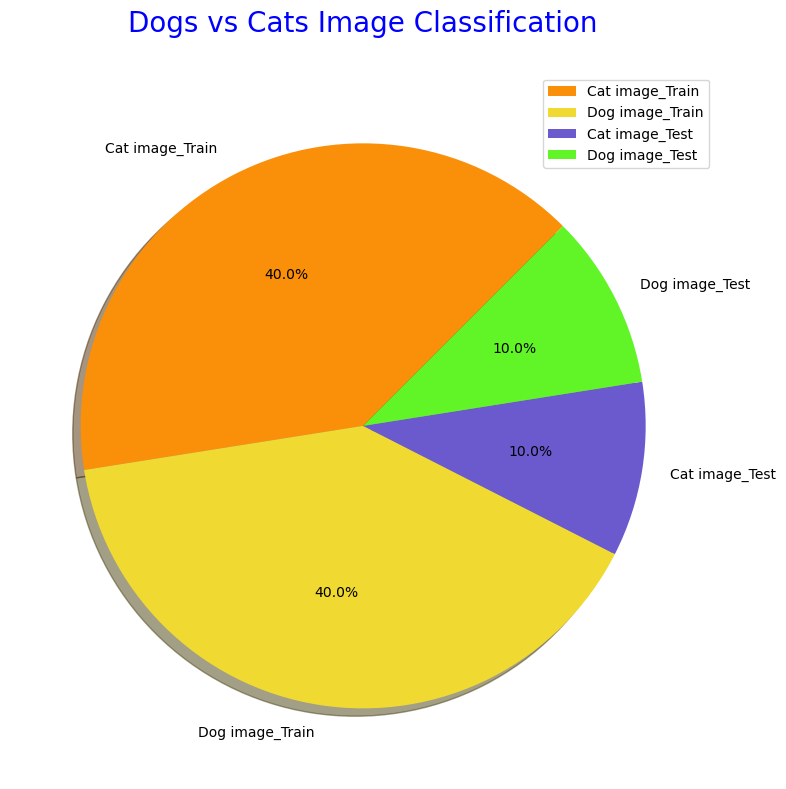

In [20]:
plt.figure(figsize=(8,8))
plt.pie(y, labels =my_label, shadow = True,colors=color,autopct='%1.1f%%',startangle=45,counterclock=True)
plt.title("Dogs vs Cats Image Classification\n",color="Blue",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.show() 

In [21]:
len(np.unique(X_train[0]))

256

In [22]:
len(np.unique(X_test[0]))

256

In [23]:
train_image=X_train/255.0

In [24]:
test_image=X_test/255.0

In [25]:
len(np.unique(train_image[0]))

256

In [26]:
len(np.unique(test_image[0]))

256

# Visualize Random Cats & Dogs Images

In [27]:
def RandomImage_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Cats and Dogs Images Visualization\n",color="blue",fontsize=20)
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()

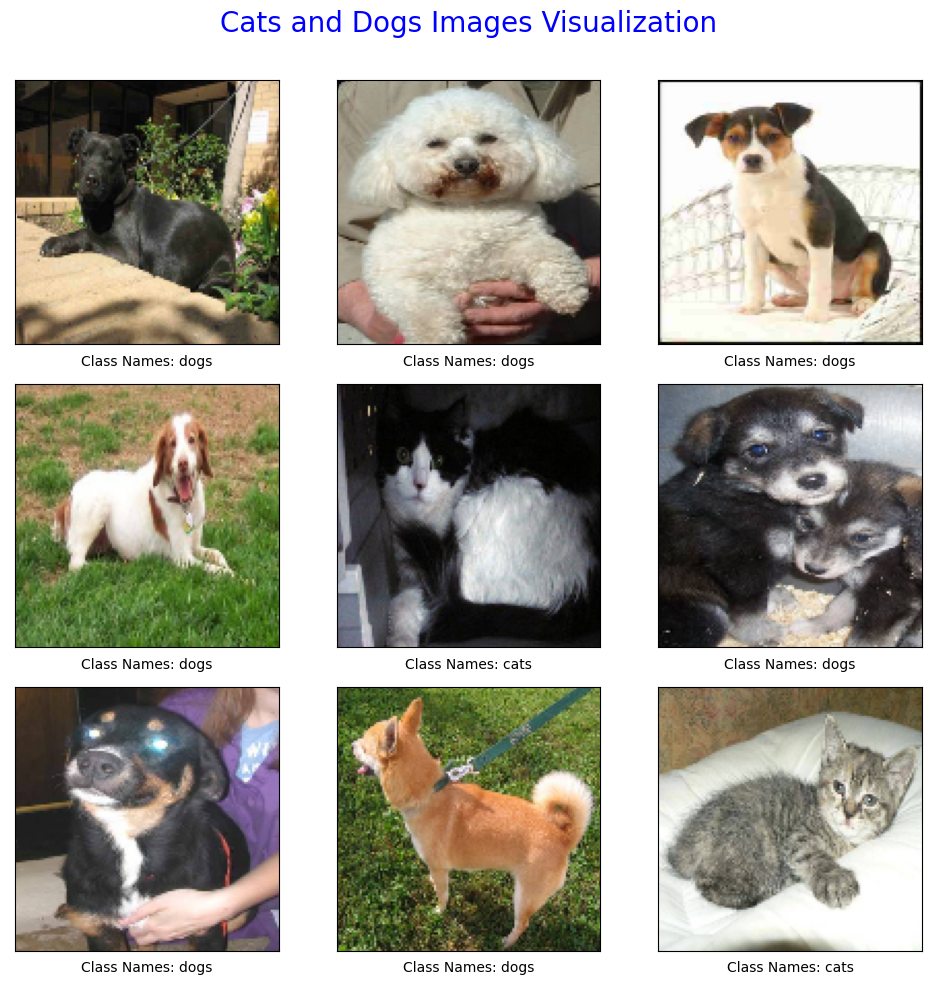

In [28]:
RandomImage_visualization(class_name,train_image,Y_train)

# Create Custom CNN Model

In [29]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [30]:
model.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

In [31]:
history=model.fit(train_image,Y_train,validation_data=(test_image,Y_test),batch_size=42,epochs=20)

Epoch 1/20
191/191 [==============================] - 13s 25ms/step - loss: 0.6994 - accuracy: 0.5163 - val_loss: 0.6803 - val_accuracy: 0.5640
Epoch 2/20
191/191 [==============================] - 4s 20ms/step - loss: 0.6569 - accuracy: 0.6115 - val_loss: 0.6310 - val_accuracy: 0.6630
Epoch 3/20
191/191 [==============================] - 4s 18ms/step - loss: 0.5808 - accuracy: 0.6959 - val_loss: 0.5517 - val_accuracy: 0.7190
Epoch 4/20
191/191 [==============================] - 4s 20ms/step - loss: 0.5332 - accuracy: 0.7312 - val_loss: 0.5540 - val_accuracy: 0.7275
Epoch 5/20
191/191 [==============================] - 4s 18ms/step - loss: 0.4899 - accuracy: 0.7591 - val_loss: 0.4766 - val_accuracy: 0.7675
Epoch 6/20
191/191 [==============================] - 4s 19ms/step - loss: 0.4368 - accuracy: 0.7908 - val_loss: 0.4573 - val_accuracy: 0.7830
Epoch 7/20
191/191 [==============================] - 3s 18ms/step - loss: 0.4020 - accuracy: 0.8177 - val_loss: 0.4642 - val_accuracy: 0.777

# Model Training Loss and Accuracy Graph

In [32]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"bo--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"ro--",label="val_accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["loss"],"bo--",label="loss")
    plt.plot(history.history["val_loss"],"ro--",label="val_loss")
    plt.title("Model Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

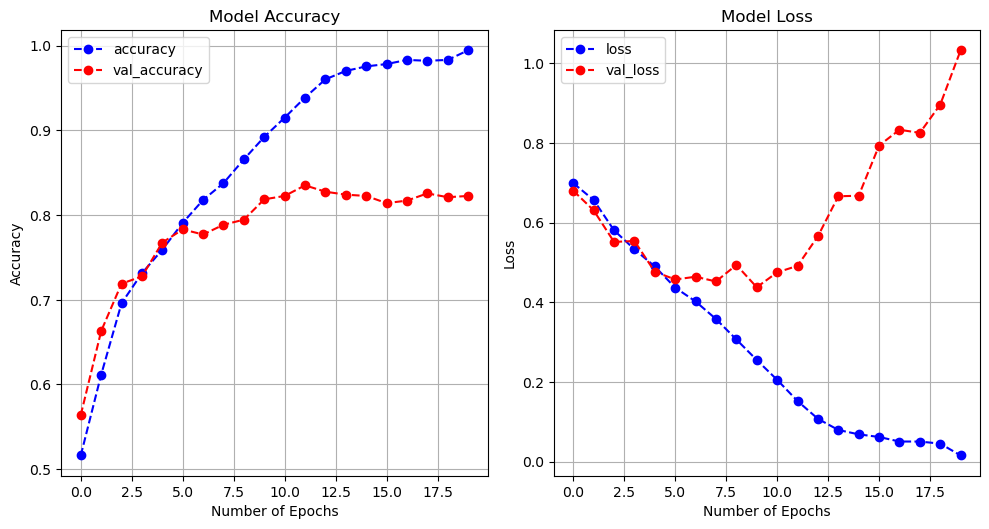

In [33]:
model_loss_and_accuracy(history)

In [34]:
model.evaluate(test_image,Y_test)

63/63 [==============================] - 1s 7ms/step - loss: 1.0331 - accuracy: 0.8225


[1.0330989360809326, 0.8224999904632568]

# Confusion Matrix

63/63 [==============================] - 0s 5ms/step


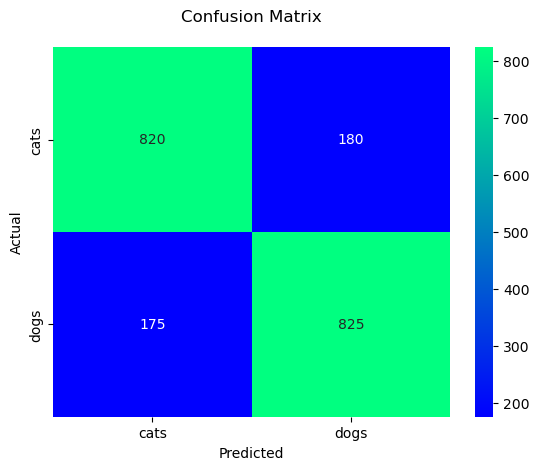

In [35]:
prediction=model.predict(test_image)
prediction_label=np.argmax(prediction,axis=1)
cm = confusion_matrix(Y_test,prediction_label)
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="winter",xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix\n")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report

In [36]:
print(classification_report(Y_test,prediction_label,target_names=["Cats","Dogs"]))

              precision    recall  f1-score   support

        Cats       0.82      0.82      0.82      1000
        Dogs       0.82      0.82      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



# Incorrect Model Prediction



In [37]:
def incorrect_Image_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Incorrect  Images Visualization\n",color="blue",fontsize=20)
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()

In [38]:
def model_prediction(class_name,imagedata,imagelabel,predict_label):
    result=(imagelabel==predict_label)
    incorrect_result=np.where(result==0)
    incorrect_result=np.asarray(incorrect_result)
    incorrect_result=incorrect_result.flatten()
    
    false_image=[]
    false_label=[]
    
    for b in incorrect_result:
        false_image.append(imagedata[b])
        false_label.append(predict_label[b])
    print("Incorrect Model Prediction:\n")
    incorrect_Image_visualization(class_name,false_image,false_label)

Incorrect Model Prediction:



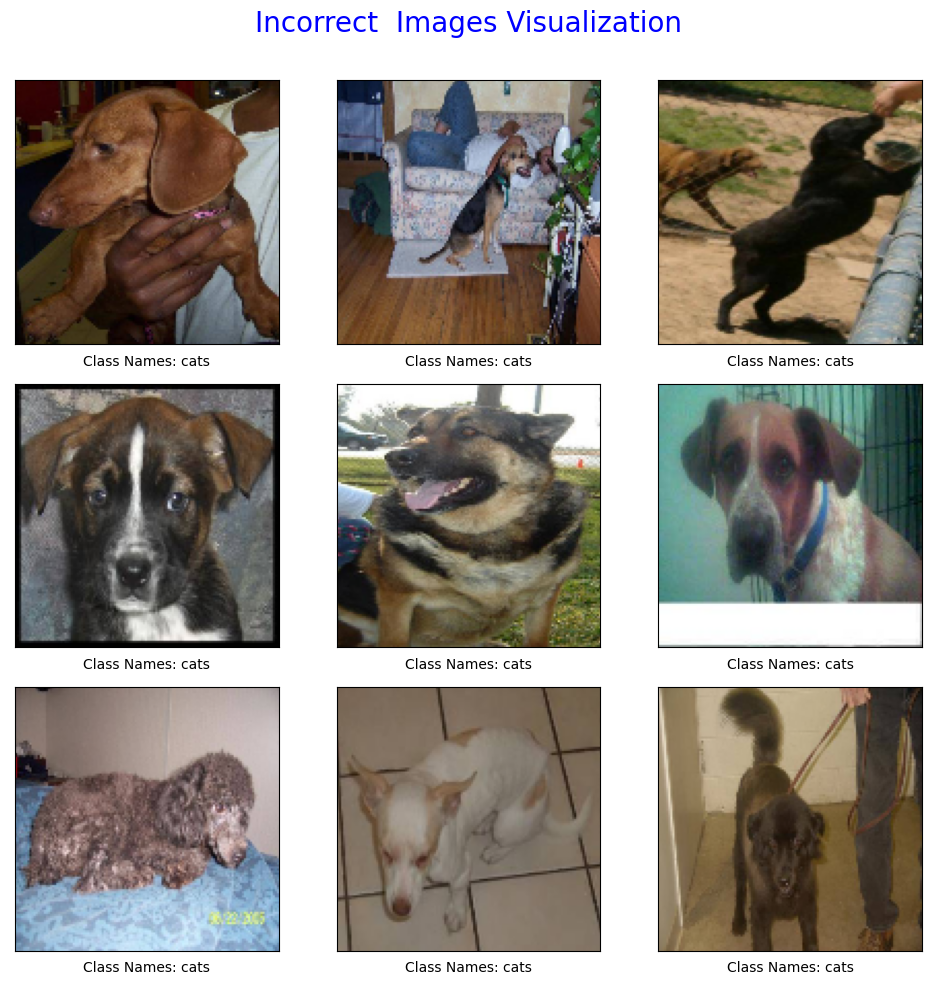

In [39]:
model_prediction(class_name,test_image,Y_test,prediction_label)

# Custom Data Prediction

1/1 [==============================] - 0s 128ms/step
cat


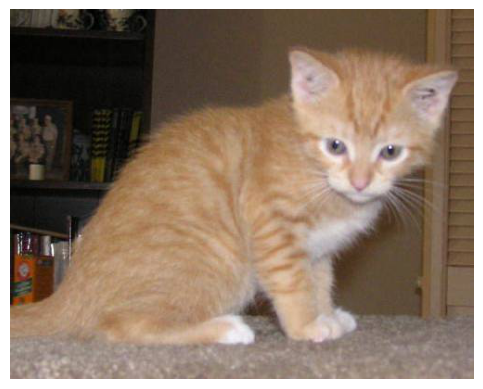

In [40]:
results={0:'cat',    1:'dog'}

test_image_path=Image.open("../input/cat-and-dogs/dataset/test_set/cats/cat.4003.jpg")
imge=test_image_path.resize(image_shape)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=np.argmax(model.predict([imge])[0])


        
print(results[final_predct])
plt.imshow(test_image_path)
plt.axis("off")
plt.show()

# implementation Part-2

In [41]:
resnetModel = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 3s 0us/step


In [42]:
imagePath= "/kaggle/input/cat-and-dogs/dataset/training_set/dogs/dog.1.jpg"

First loads an image from the file path specified in the imagePath variable. It resizes the image to the target size of (224, 224) pixels. The loaded image is stored in the img variable. Convert the image to an array. Add a new dimension to the array - This is done because most deep learning models expect the input data to be in the shape of a batch of images. Preprocess the image - preprocess the input image before it is fed to a pre-trained deep learning model. The preprocessing step varies depending on the model and the type of data. In this case, the function subtracts the mean pixel values of the ImageNet dataset from the input image. This is a common preprocessing step for many pre-trained models trained on the ImageNet dataset.

In [43]:
img = image.load_img(imagePath, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

In [44]:
modelPredictions = resnetModel.predict(x)

1/1 [==============================] - 1s 1s/step


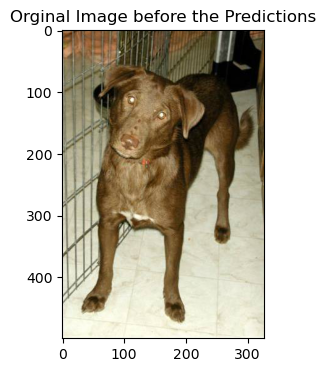

35363/35363 [==============================] - 0s 0us/step
Predicted Class: Chesapeake Bay
Accuracy : 0.8515661954879761


In [45]:
plt.figure(figsize = (6, 4))
imageRead = plt.imread("/kaggle/input/cat-and-dogs/dataset/training_set/dogs/dog.1.jpg")
plt.imshow(imageRead)
plt.title("Orginal Image before the Predictions")
plt.show()
#print("Predictions Result is : {}".format(decode_predictions(modelPredictions, top = 3)[0]))
# _, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
# print("Predicted Class: {}\nAccuracy : {}%".format(classnames, accuracy))
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNamesFirst, classNamesSec = r[0].title(), r[1].title()
print("Predicted Class: {} {}\nAccuracy : {}".format(classNamesFirst, classNamesSec, accuracy))

decode_predictions is a function from the Keras API that is used to convert the model's predicted class probabilities into a list of human-readable labels. The function returns a list of tuples, where each tuple contains three elements: the index of the predicted class, the name of the predicted class, and the corresponding probability. The number of tuples returned is equal to the top argument. For example, if top is set to 3, the function will return a list of the top 3 predicted classes, sorted by their probabilities in descending order. Each tuple in the list can be accessed using array indexing, like result [0] to get the top prediction, result[1] to get the second top prediction, and so on.

In [46]:
# a, b, c = [(3, 4, 5)]

In [47]:
decode_predictions(modelPredictions, top = 3)

[[('n02099849', 'Chesapeake_Bay_retriever', 0.8515662),
  ('n02105412', 'kelpie', 0.091880426),
  ('n02099712', 'Labrador_retriever', 0.009123372)]]

In [48]:
decode_predictions(modelPredictions, top = 3)[0]

[('n02099849', 'Chesapeake_Bay_retriever', 0.8515662),
 ('n02105412', 'kelpie', 0.091880426),
 ('n02099712', 'Labrador_retriever', 0.009123372)]

In [49]:
decode_predictions(modelPredictions, top = 3)[0][0]

('n02099849', 'Chesapeake_Bay_retriever', 0.8515662)

In [50]:
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNamesFirst, classNamesSec = r[0].title(), r[1].title()
print("Predicted Class: {} {}\nAccuracy : {}%".format(classNamesFirst, classNamesSec, accuracy))

Predicted Class: Chesapeake Bay
Accuracy : 0.8515661954879761%


In [51]:
r = classnames.split("_")

In [52]:
classNamesFirst, classNamesSec = r[0].title(), r[1].title()

In [53]:
# model = Sequential()
# # Input Layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # HiddenLayer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # # Hidden Layer 02
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # # Hidden Layer 03
# model.add(Conv2D(128))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Flatten Layer
# model.add(Flatten())

# # Fully Connceted Neural Network
# model.add(Dense(128))
# model.add(Dense(number_of_classes))

In [54]:
def drawTextonImage(names, predictions, input_image):
    backgroundColor = [0, 0, 0]
    expandImage = cv2.copyMakeBorder(input_image, 0, 0, 0, imageL.shape[1]+300, cv2.BORDER_CONSTANT, value = backgroundColor)
    image_width = input_image.shape[1]
    
    for (i, predictions) in enumerate(predictions):
        imageStrings = str(predictions[1])  + " " + str(predictions[2])
        
        cv2.putText(expandImage, str(names), (image_width + 50, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        cv2.putText(expandImage, imageStrings, (image_width + 50, 50+((i+1)*50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        plt.imshow(expandImage)
    
imagePath = "/kaggle/input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

In [55]:
len(imageFileName)

1000

1/1 [==============================] - 0s 25ms/step


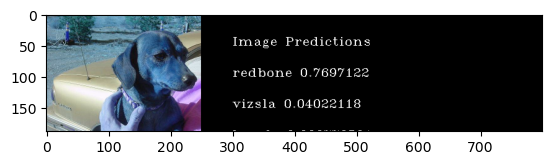

In [56]:
from tensorflow.keras.preprocessing import image
for file in imageFileName[:5]:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    imageNew = cv2.imread(imagePath+file)
    imageL = cv2.resize(imageNew, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)
    
    predictions = resnetModel.predict(x)
    predictions = decode_predictions(predictions, top = 3)[0]
    drawTextonImage("Image Predictions ", predictions, imageL)

# VGG16 and ResNet50

In [57]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50
from tensorflow.keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict

In [58]:
vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')

96112376/96112376 [==============================] - 4s 0us/step


# VGG-16

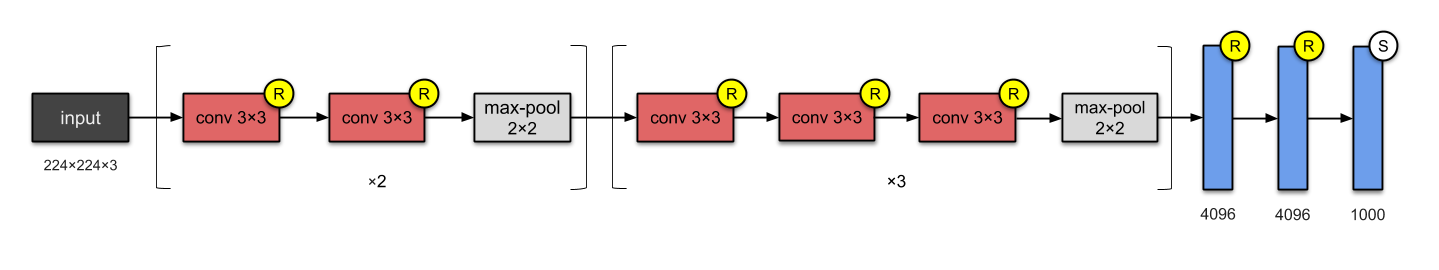

1/1 [==============================] - 0s 24ms/step


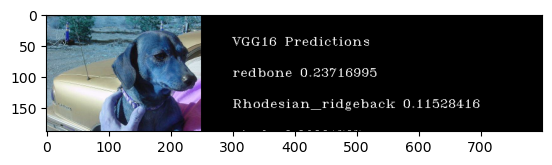

In [59]:
imagePath = "/kaggle/input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

for file in imageFileName[:5]:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(imagePath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get VGG16 Predictions
    preds_vgg_model = vgg_model.predict(x)
    preditions_vgg = decode_predictions(preds_vgg_model, top=3)[0]
    drawTextonImage("VGG16 Predictions", preditions_vgg, imageL) 

# ResNet50

1/1 [==============================] - 0s 26ms/step


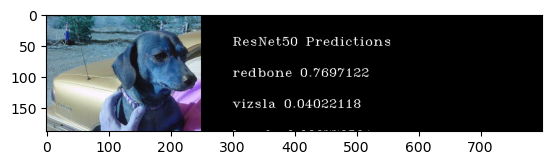

In [60]:
imagePath = "/kaggle/input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

for file in imageFileName[:5]:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv2.imread(imagePath+file)
    imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC) 
    
    # Get ResNet50 Predictions
    preds_resnet = resnet_model.predict(x)
    preditions_resnet = decode_predictions(preds_resnet, top=3)[0]
    drawTextonImage("ResNet50 Predictions", preditions_resnet, imageL) 
#     cv2.waitKey(0)

# cv2.destroyAllWindows()